# Ideas

## image cropping

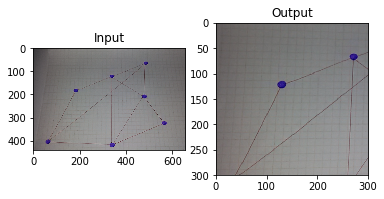

In [37]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('12.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

(<matplotlib.image.AxesImage at 0x1067e0fd0>, Text(0.5,1,'Input2'))

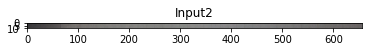

In [52]:
img = cv.imread('12.png', cv.COLOR_BGR2GRAY)
rows,cols,ch = img.shape
plt.imshow(img),plt.title('Input')
plt.imshow(img[:10][:10]),plt.title('Input2')

In [47]:
type(img)

numpy.ndarray

## Image viewer

In [4]:
from skimage import io, viewer
img = io.imread('12.png', as_grey=True)  # load the image as grayscale
print('image matrix size: ', img.shape)      # print the size of image
print('\n First 5 columns and rows of the image matrix: \n', img[:5,:5]*255) 
viewer.ImageViewer(img).show()              # plot the image

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


image matrix size:  (438, 656)

 First 5 columns and rows of the image matrix: 
 [[53.5654 54.2087 55.0683 55.1404 54.9279]
 [53.5654 55.4933 56.3529 56.3529 55.1404]
 [54.5654 55.5654 57.6375 56.6375 55.6375]
 [53.6375 54.6375 55.6375 56.6375 56.6375]
 [53.85   55.6375 55.6375 55.7096 56.7096]]


[]

## Pretreatment


 First 5 columns and rows of the image_sharpen matrix: 
 [[52.2788 51.4232 53.2866 53.     52.0779]
 [48.7096 57.7741 57.2125 58.4933 52.5712]
 [54.4933 55.4933 63.9942 56.9221 53.6317]
 [50.4971 52.7096 53.6375 58.5654 56.0625]
 [50.7    60.3529 56.4933 54.7817 57.9221]]


/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


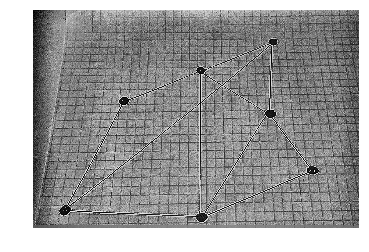

In [100]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('12.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

# kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # белый на черном
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) # черная на белом

image_sharpen = cv2.filter2D(img,-1,kernel)
# we use 'valid' which means we do not add zero padding to our image
# image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)

# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('get.png')
plt.show()

## Apply sharpen and edge detection filters back to back

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


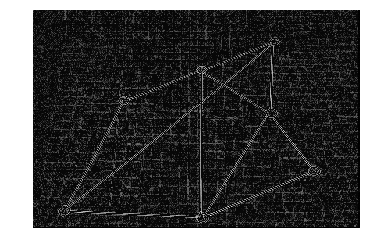

In [54]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('12.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')

edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

plt.imshow(edges_equalized, cmap=plt.cm.gray)    # plot the edges_clipped
plt.axis('off')
plt.show()

## Apply blur filter to denoise an image

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


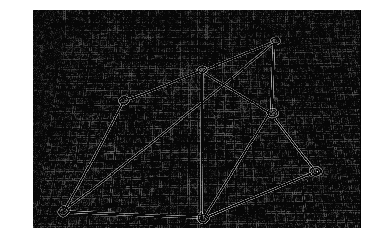

In [23]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('12.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')

# apply edge detection filter to the sharpen image
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')

# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)

plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.axis('off')
plt.show()

## My filtering

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


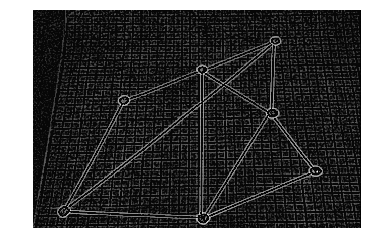

In [55]:
import cv2
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('12.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(img, edge_kernel, 'valid')

# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
noised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')

unnoise_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(noised, unnoise_kernel, 'valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)

plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.axis('off')
plt.show()

In [113]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

def print_img(crimg):
    plt.imshow(crimg)
    plt.xticks([]), plt.yticks([])
    plt.show()

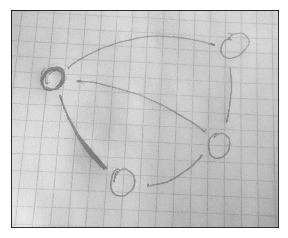

In [118]:
img_c = cv2.imread(r'13.png', 0) 
img = cv2.cvtColor(img_c, cv2.COLOR_GRAY2RGB)
print_img(img)

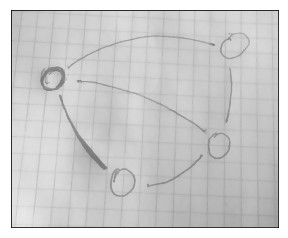

In [119]:
img_denoise = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
print_img(img_denoise)

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


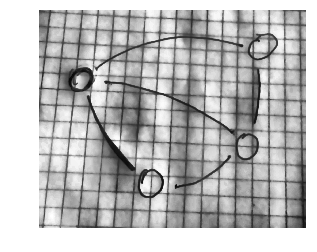

In [121]:
img = color.rgb2gray(img_denoise)       # Convert the image to grayscale (1 channel)

# kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # белый на черном
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0; # черная на белом

# image_sharpen = cv2.filter2D(img,-1,kernel)
# we use 'valid' which means we do not add zero padding to our image
image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
#print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)

# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('get.png')
plt.show()

In [116]:
type(image_sharpen)

numpy.ndarray

In [1]:
img_denoise = cv2.fastNlMeansDenoising(image_sharpen, None, 10, 7, 21)
print_img(img_denoise)

NameError: name 'cv2' is not defined